In [ ]:
pip install torch matplotlib numpy pandas

In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 33.9 MB/s eta 0:00:00


In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

# Terminate open tunnels if they exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2qtNcpY0pfgni2yMzmQ6Xxk9nrD_4FFQ3Vb1sbfNqRb6czn7V"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr = "5000", proto = "http", bind_tls = True)

print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://f0de-34-16-253-204.ngrok-free.app



# Install necessary libraries


In [ ]:
import mlflow
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

#Load the datasets

In [ ]:
emnist_train_data  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FullStackDeepLearning/final_code/datasets/emnist-letters-train.csv")
emnist_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FullStackDeepLearning/final_code/datasets/emnist-letters-test.csv")

# Explore the dataset

In [ ]:
emnist_train_data.head(10)

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
emnist_test_data.head(10)

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
emnist_train_data.shape

(88799, 785)

In [ ]:
emnist_train_data.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
emnist_test_data = emnist_test_data.sample(frac=1) # Shuffling the test data as well

In [ ]:
emnist_test_data.head(10)

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
2783,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11395,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9556,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11916,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8864,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9542,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9924,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6081,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6375,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14287,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

### Visualising a few training images. Label is subtracted by 1 to start the numbering from 0

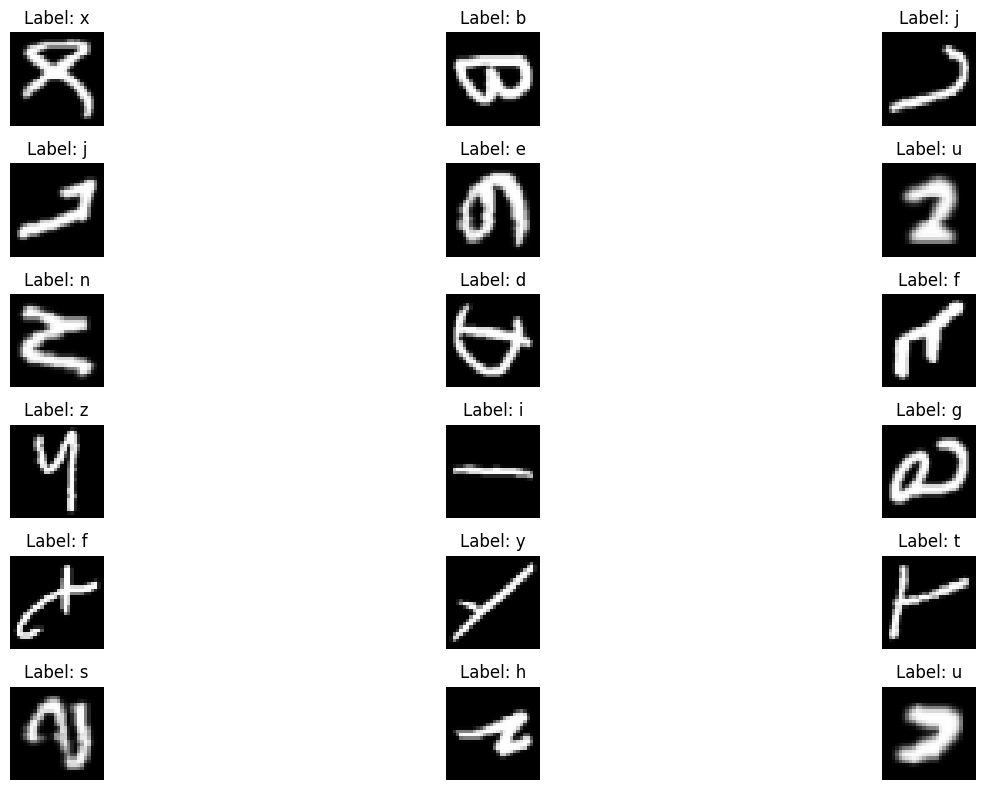

In [ ]:
# Assuming the first column contains labels and the rest are pixel values
train_labels = emnist_train_data.values[:, 0]
train_images = emnist_train_data.values[:, 1:]

# Reshape the images to (num_samples, 28, 28)
train_images = train_images.reshape(-1, 28, 28)

# Display a few random images
num_samples = 18

random_indices = np.random.randint(0, len(train_images), num_samples)

random_indices

fig = plt.figure(figsize = (16, 8))

for i, idx in enumerate(random_indices):
    plt.subplot(6, int(num_samples / 6), i+1)
    plt.imshow(train_images[idx] / 255.0, cmap = "gray")
    plt.title(f"Label: {classes[int(train_labels[idx] - 1)]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Creating the MLflow experiment

In [ ]:
experiment_id = mlflow.create_experiment(name = 'test_experiment')

experiment_id

'760299637442133376'

Creating a sample experiment

In [ ]:
experiment = mlflow.get_experiment(experiment_id)

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: test_experiment
Experiment_id: 760299637442133376
Artifact Location: file:///content/mlruns/760299637442133376
Tags: {}
Lifecycle_stage: active
Creation timestamp: 1735583093604


In [ ]:
mlflow.set_experiment(experiment_name = 'test_experiment')

<Experiment: artifact_location='file:///content/mlruns/760299637442133376', creation_time=1735583093604, experiment_id='760299637442133376', last_update_time=1735583093604, lifecycle_stage='active', name='test_experiment', tags={}>

In [ ]:
mlflow.start_run()

mlflow.end_run()

In [ ]:
data_info = """
  The EMNIST dataset is a set of handwritten character digits derived
  from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset
  structure that directly matches the MNIST dataset.
  Further information on the dataset contents and conversion process can be found in
  the paper available at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt", "w") as f:
    f.write(data_info)

### Logging Experiment with MLflow

In [ ]:
with mlflow.start_run(run_name = 'test_experiment_run') as current_run:

    mlflow.log_metric('Accuracy', 0.67)

    params = {
        'num_nn_layers': 4
    }
    mlflow.log_params(params)

    mlflow.log_figure(fig, 'sample_images.png')

    mlflow.log_artifact("data_info.txt")

    mlflow.set_tag('EMNIST', 'Classification using DNNs')

### Creating a Custom Dataset Class for EMNIST Data

In [ ]:
class EMNISTDataset(Dataset):
    def __init__(self, dataframe):

        self.images = torch.tensor(dataframe.iloc[:, 1:].values, dtype= torch.float32)

        self.labels = torch.tensor(dataframe.iloc[:, 0].values, dtype = torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        images = self.images[idx]

        images = images / 255.0
        labels = self.labels[idx]

        return images, labels

### Splitting the Dataset into Training and Validation Sets

In [ ]:
train_dataset = EMNISTDataset(emnist_train_data)

test_dataset = EMNISTDataset(emnist_test_data )

len(train_dataset), len(test_dataset)

(88799, 14799)

### Creating DataLoaders for Training, Validation, and Testing

In [ ]:
from torch.utils.data import random_split

val_percent = 0.1
val_len = int(val_percent * len(train_dataset))

train_ds, val_ds = random_split(train_dataset, [len(train_dataset) - val_len, val_len])

print(len(train_ds), len(val_ds))

79920 8879


### Initializing DataLoader for Training, Validation, and Testing

In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_ds, batch_size, shuffle = True, drop_last = True, num_workers=1)

val_dataloader = DataLoader(val_ds, batch_size, num_workers=1)

test_dataloader = DataLoader(test_dataset, batch_size, num_workers=1)

len(train_dataloader ), len(val_dataloader ), len(test_dataloader )

(1248, 139, 232)

### Inspecting a Batch of Training Data

In [ ]:
dataiter = iter(train_dataloader)
batch_images, batch_labels = next(dataiter)

batch_images

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### Displaying Batch Labels

In [ ]:
batch_labels

tensor([25.,  2., 11.,  2., 25.,  6., 24., 10., 25., 24., 20., 26.,  1.,  5.,
        15.,  3.,  3.,  4., 24., 18., 23., 23.,  5., 16., 25., 14., 21.,  4.,
        14.,  5., 16.,  4.,  4.,  1., 21.,  2., 22., 21.,  1., 21., 14., 22.,
         5., 26.,  1., 22., 11., 15.,  8.,  4., 22., 26.,  2.,  1.,  8., 26.,
         1., 21.,  1., 20.,  5., 24.,  5.,  2.])

### Checking the Shape of Batch Images and Length of Batch Labels

In [ ]:
batch_images.shape, len(batch_labels)

(torch.Size([64, 784]), 64)

In [ ]:
import mlflow

experiment_id = mlflow.create_experiment(name = "emnist_letters_prediction_using_dnn")

mlflow.set_experiment(experiment_name = "emnist_letters_prediction_using_dnn")

<Experiment: artifact_location='file:///content/mlruns/943924518509455666', creation_time=1735584621298, experiment_id='943924518509455666', last_update_time=1735584621298, lifecycle_stage='active', name='emnist_letters_prediction_using_dnn', tags={}>

### Importing Required Libraries for Model Definition

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy

### Setting Input and Output Sizes for the Model

In [ ]:
input_size = 28 * 28

output_size = 26

### Defining the Neural Network Model

In [ ]:
class EmnistModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss()

        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 128)
        self.linear3 = nn.Linear(128, 32)
        self.linear4 = nn.Linear(32, output_size)

    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.relu(out)

        out = self.linear4(out)
        return out

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr = 0.0001)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("train_loss", loss, on_epoch = True, prog_bar = True)
        self.log("train_acc", acc, on_epoch = True, prog_bar = True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("valid_loss", loss, on_epoch = True, prog_bar = True)
        self.log("valid_acc", acc, on_epoch = True, prog_bar = True)

        return acc

    def test_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("test_loss", loss, logger = True)
        self.log("test_acc", acc, logger = True)

        return acc


    def predict_step(self, batch, batch_idx, dataloader_idx = 0):
        x, y = batch

        return self(x)

Model Training is done  with Trainer and All parameters are autologged using mlflow autologging and Trained Model is logged separately with defined Signature with input and output schema. Model metrics are also separately logged using CSV logger. Training is done for 10 epochs and then Model is tested on Test dataloader

In [ ]:
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec, Schema, TensorSpec
from pytorch_lightning.loggers import CSVLogger

emnist_model = EmnistModel()

logger = CSVLogger("logs", name = "emnist_letters_classification")

trainer = pl.Trainer(max_epochs = 10, logger = logger)

mlflow.pytorch.autolog(log_models = False)

with mlflow.start_run() as run:

    trainer.fit(emnist_model, train_dataloader, val_dataloader)
    trainer.test(dataloaders = test_dataloader)

    input_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 784))])
    output_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 26))])

    signature = ModelSignature(inputs = input_schema, outputs = output_schema)

    mlflow.pytorch.log_model(emnist_model, "emnist-letters-classifier-dnn-model", signature = signature)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
2024/12/30 19:00:15 WARNING mlflow.utils.autologging_utils: MLflow pytorch autologging is known to be compatible with 1.9.0 <= torch <= 2.5.1, but the installed version is 2.5.1+cu121. If you encounter errors during autologging, try upgrading / downgrading torch to a compatible version, or try upgrading MLflow.
2024/12/30 19:00:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/mlflow/pytorch/_lightning_autolog.py:465: UserWarning: Autologging is known to be compatible with pytorch-lightning versions between 1.9.0 and 2.4.0 and may not succeed with packages outside this range."
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:00:31 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:00:45 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:00:59 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:01:12 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:01:26 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:01:40 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:01:54 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:02:08 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:02:22 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


Validation: |          | 0/? [00:00<?, ?it/s]

2024/12/30 19:02:36 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at logs/emnist_letters_classification/version_0/checkpoints/epoch=9-step=12480.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.util

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8516791462898254     │
│         test_loss         │    0.48461824655532837    │
└───────────────────────────┴───────────────────────────┘

2024/12/30 19:02:38 WARNING mlflow.utils.requirements_utils: Found torch version (2.5.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.5.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/30 19:02:50 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-12-04; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'google-genai'}


### Evaluating Model Performance on Test Data

In [ ]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

metrics

,epoch,step,test_acc,test_loss,train_acc_epoch,train_acc_step,train_loss_epoch,train_loss_step,valid_acc,valid_loss
0,0,49,NaN,NaN,NaN,0.171875,NaN,3.198834,NaN,NaN
1,0,99,NaN,NaN,NaN,0.187500,NaN,3.092024,NaN,NaN
2,0,149,NaN,NaN,NaN,0.265625,NaN,2.841896,NaN,NaN
3,0,199,NaN,NaN,NaN,0.359375,NaN,2.555415,NaN,NaN
4,0,249,NaN,NaN,NaN,0.312500,NaN,2.435829,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
265,9,12399,NaN,NaN,NaN,0.875000,NaN,0.339290,NaN,NaN
266,9,12449,NaN,NaN,NaN,0.890625,NaN,0.408701,NaN,NaN
267,9,12479,NaN,NaN,NaN,NaN,NaN,NaN,0.870256,0.437486
268,9,12479,NaN,NaN,0.875175,NaN,0.411024,NaN,NaN,NaN


### Visualizing Training and Validation Metrics

<Axes: xlabel='epoch'>

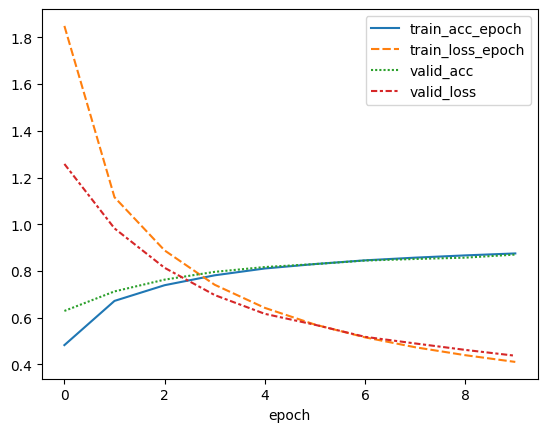

In [ ]:
import seaborn as sns

# Set the epoch column as the index, for easier plotting
metrics.set_index("epoch", inplace = True)
metrics.drop(columns = ['step', 'train_loss_step',
                        'train_acc_step', 'test_acc', 'test_loss'], inplace = True)
# Create a line plot of the training metrics using Seaborn
sns.lineplot(data = metrics)

In [ ]:
run_id = mlflow.last_active_run().info.run_id

run_id

'adaa4ba42ecd43729e2a0ddae8734d46'

### Inspecting Test Data

In [ ]:
test_dataiter = iter(test_dataloader)

test_imgs, test_labels = next(test_dataiter)

test_imgs.shape, test_labels.shape

(torch.Size([64, 784]), torch.Size([64]))

### Making Predictions with the Loaded Model

In [ ]:
logged_model = f"runs:/{run_id}/emnist-letters-classifier-dnn-model"

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

predictions = loaded_model.predict(test_imgs.numpy())

predictions[:5]

array([[ 5.7023525e-01, -1.8443178e-01, -1.3506580e+01,  8.4425831e+00,
        -1.1706254e+01, -1.6693947e+01,  2.6332338e+00, -5.1885767e+00,
        -8.4705706e+00,  1.8062940e+00, -1.0859621e+01, -7.4469714e+00,
        -8.3952093e+00, -4.3195658e+00, -5.5999856e+00, -1.3910535e+01,
         2.1177502e+00, -7.5863962e+00, -6.7548652e+00, -5.7526298e+00,
         4.0088031e-01, -7.5883403e+00, -3.8961594e+00, -5.8292885e+00,
        -2.3727980e+00, -1.7710229e+00],
       [ 2.8538103e+00, -1.4659612e+00,  4.6553922e+00,  4.0356874e+00,
         1.4017863e+00, -7.6275501e+00,  1.1915525e+00, -1.1797072e+01,
        -7.7254629e+00, -1.1837575e+00, -7.8360658e+00, -1.1544374e+01,
        -4.6597304e+00,  1.1655704e+00,  1.0004898e+01, -2.4811795e+00,
         1.6967663e+00,  1.1927803e+00,  7.2147751e-01, -4.3077989e+00,
        -4.0221104e-01, -6.6313653e+00, -8.1470346e+00, -8.2390337e+00,
        -5.6956520e+00,  1.1403984e+00],
       [-7.5280833e-01,  1.9484456e+00,  3.6781330e+00

In [ ]:
test_labels[6].item()

13.0

In [ ]:
classes[int(test_labels[6].item()) - 1]

'm'

In [ ]:
predictions[6]

array([ 1.3483739 , -6.36455   , -5.9103236 , -0.39384595, -3.3192327 ,
       -2.9059987 , -3.2205892 , -2.32253   , -5.95858   , -8.303773  ,
       -1.7505318 , -7.811666  , 11.8059635 ,  2.6602197 , -3.245128  ,
       -5.355041  , -2.0562713 ,  1.4533573 , -3.8622723 , -4.244119  ,
       -0.65973043, -1.4353986 , -0.18507755, -1.8459262 , -3.196496  ,
       -6.4416    ], dtype=float32)

In [ ]:
classes[np.argmax(predictions[6])]

'm'

### Visualizing Model Predictions

In [ ]:
def show(idx, title):

    plt.figure()
    plt.imshow(test_imgs[idx].numpy().reshape(28, 28), cmap = "gray")

    plt.axis("off")
    plt.title("\n\n{}".format(title), fontdict = {"size": 16})

<ipython-input-45-de63a52b775e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


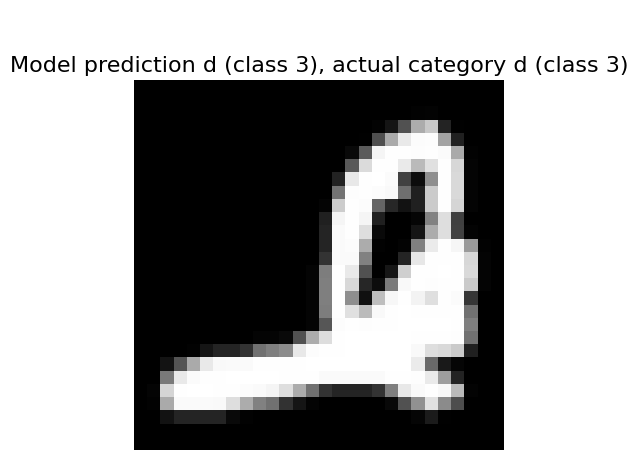

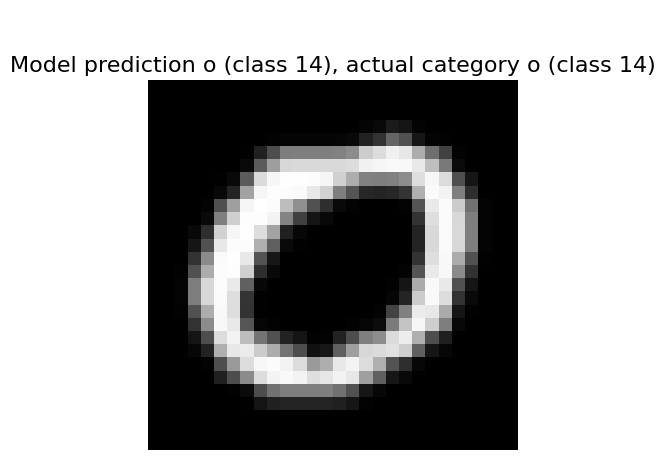

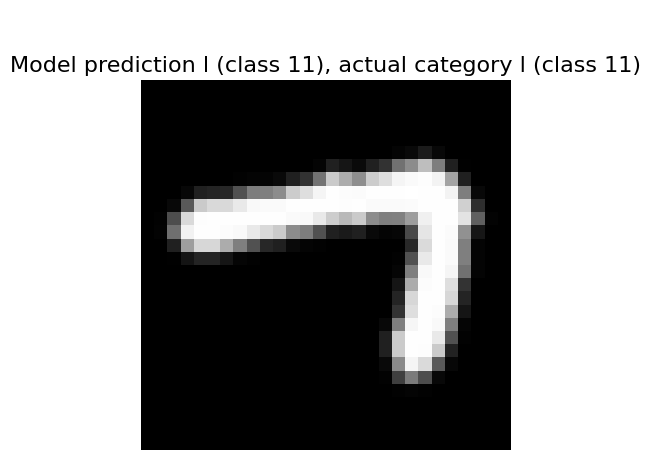

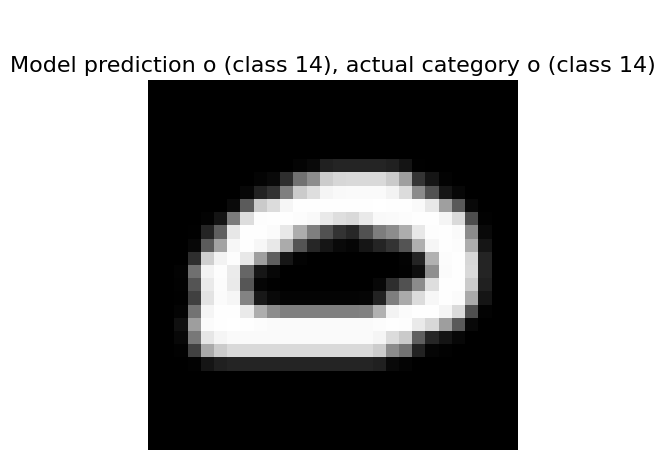

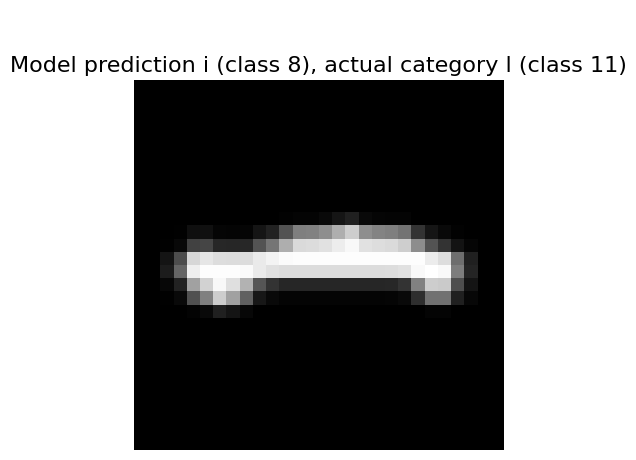

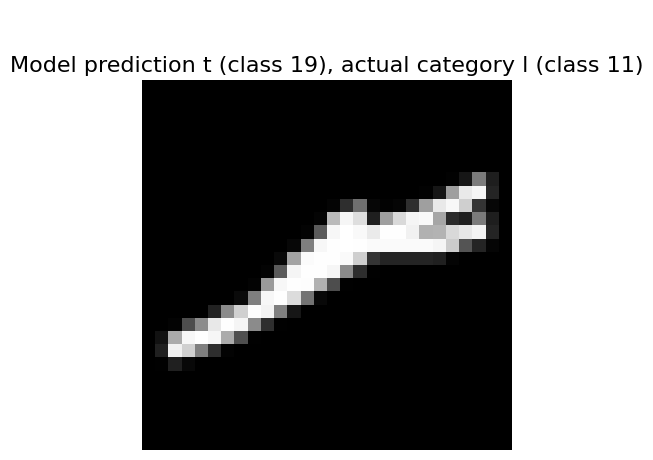

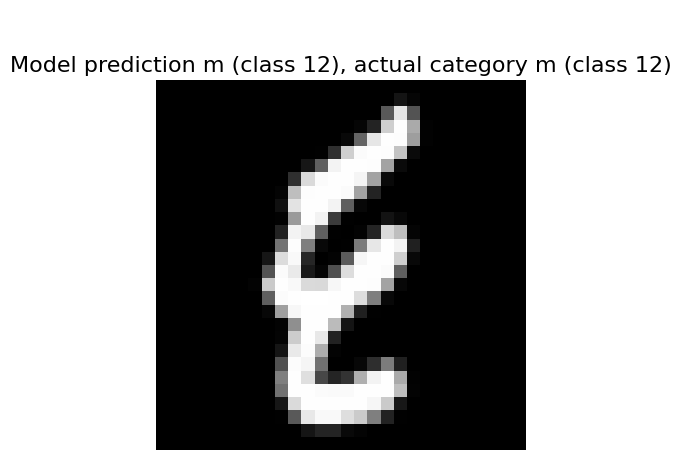

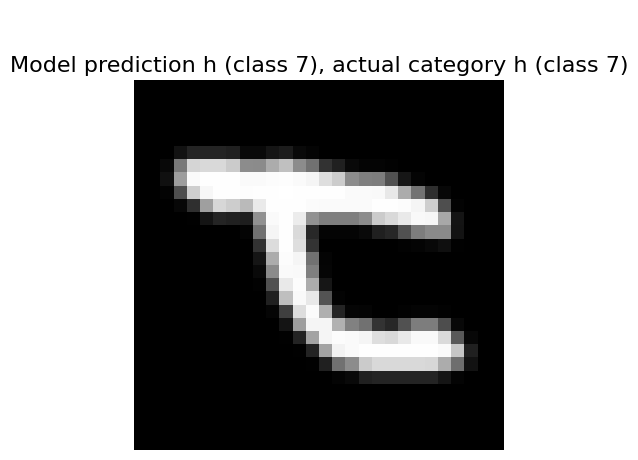

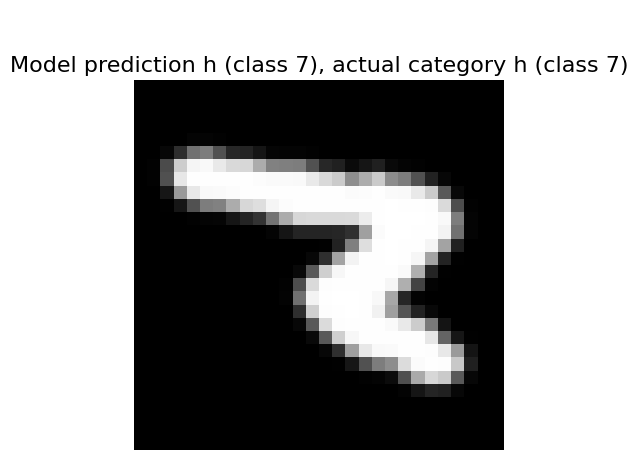

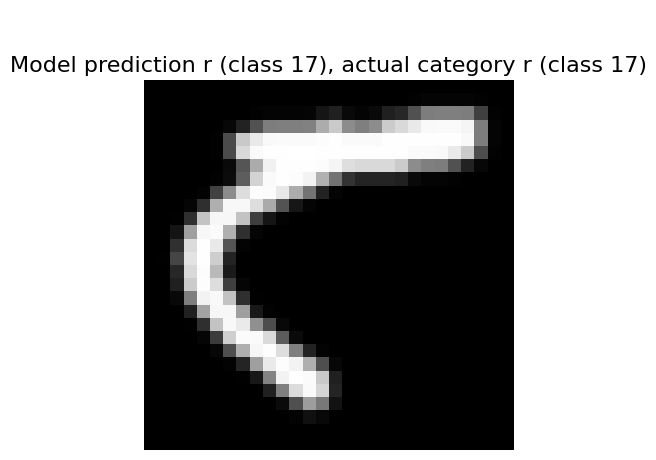

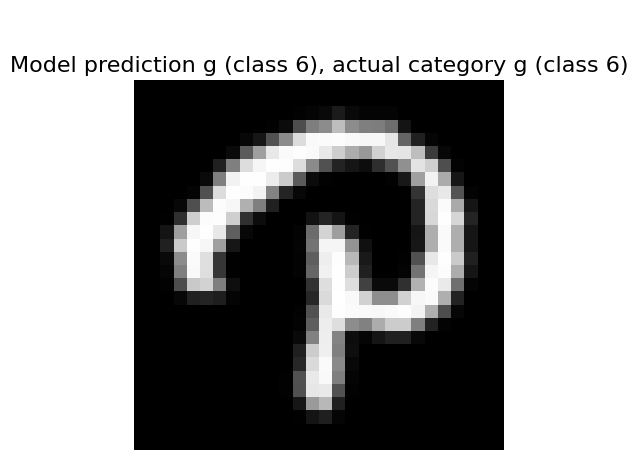

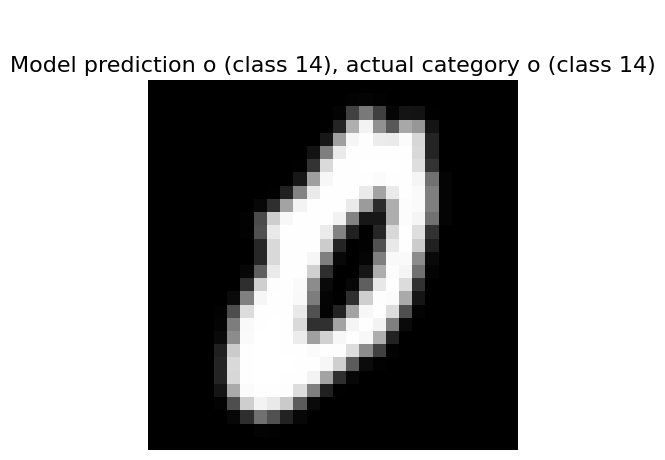

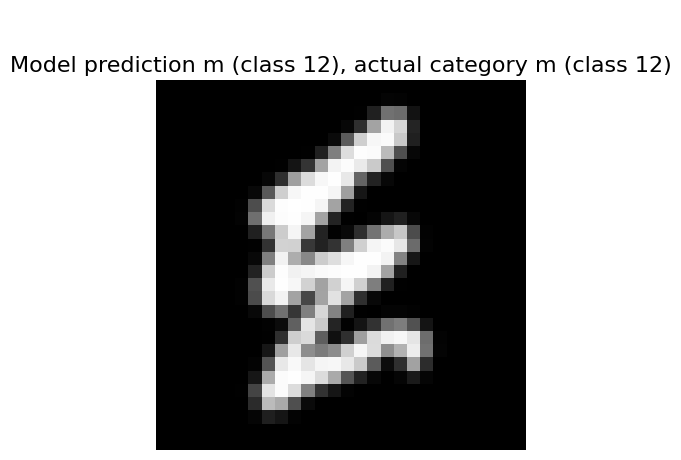

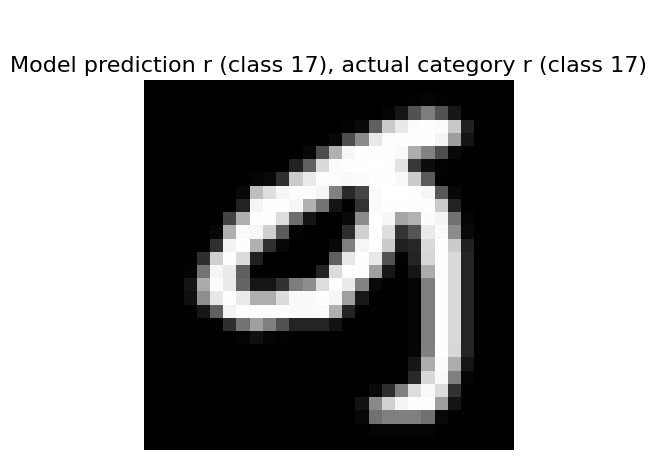

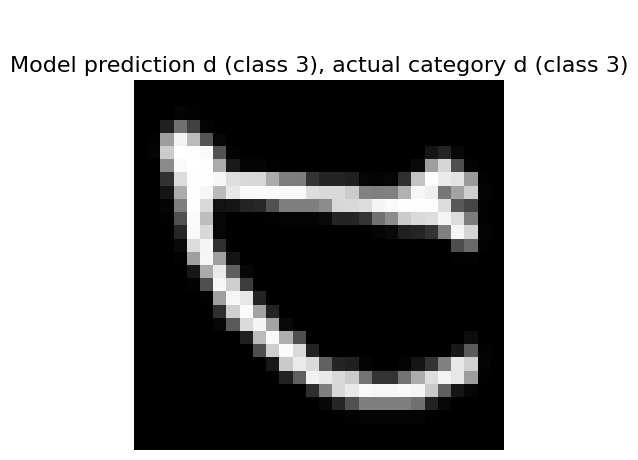

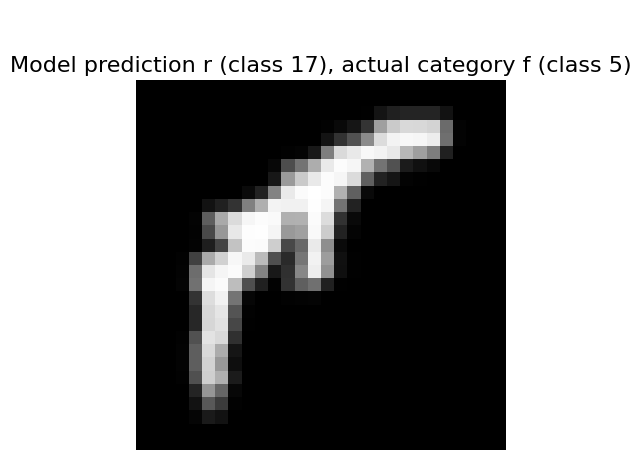

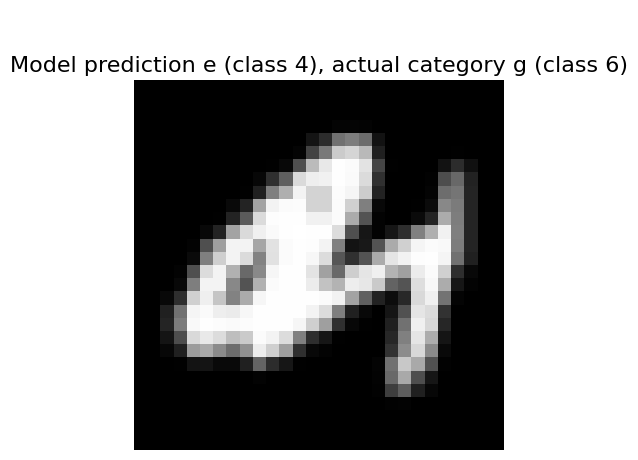

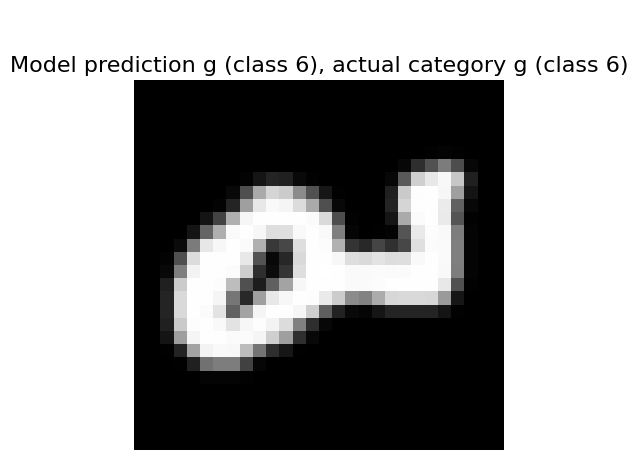

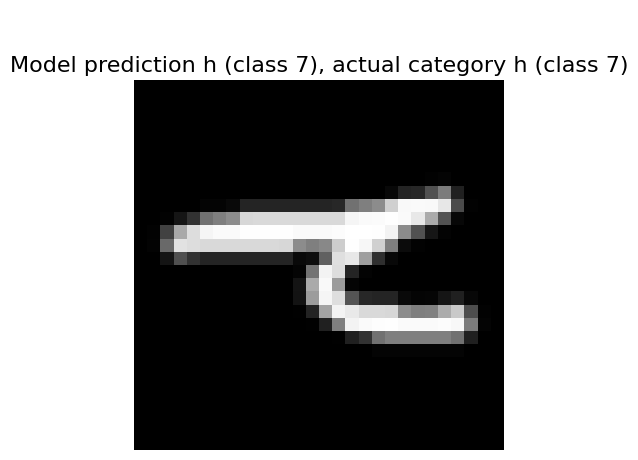

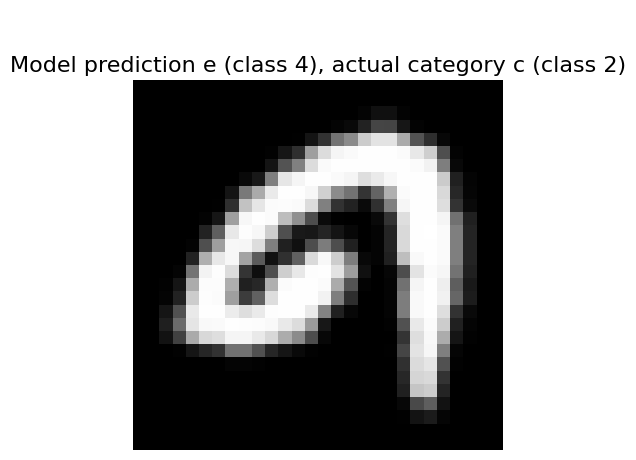

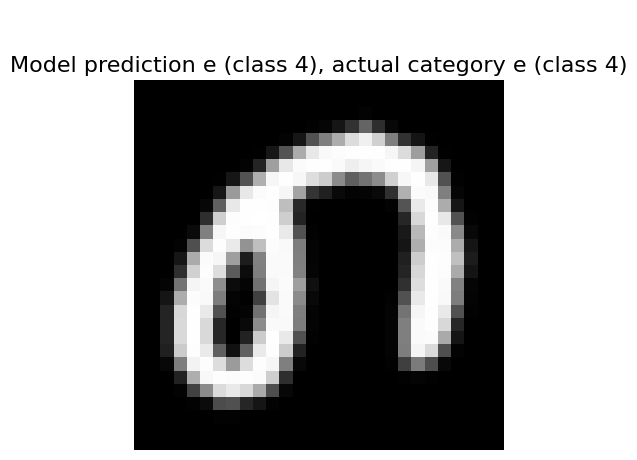

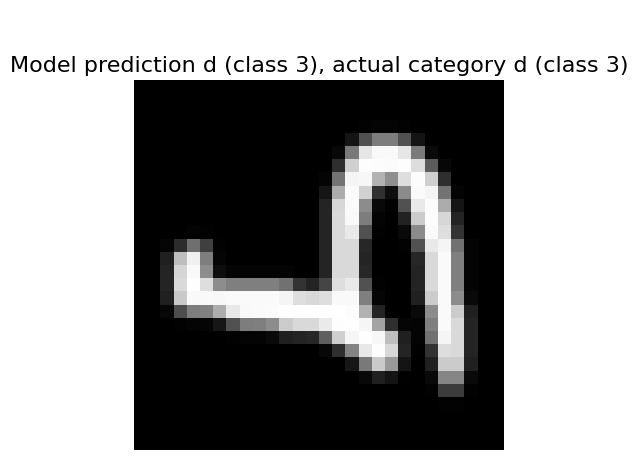

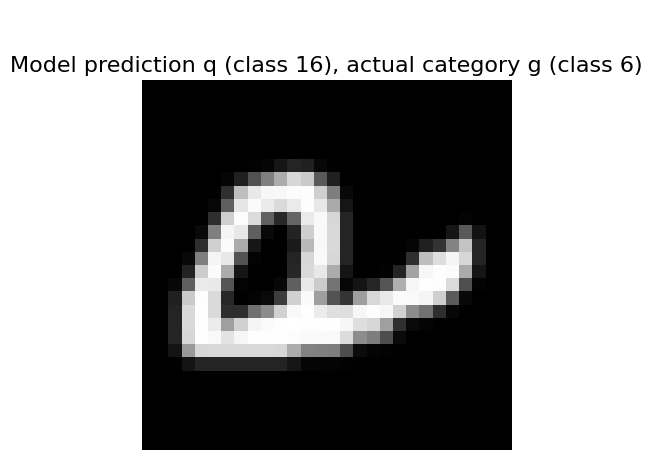

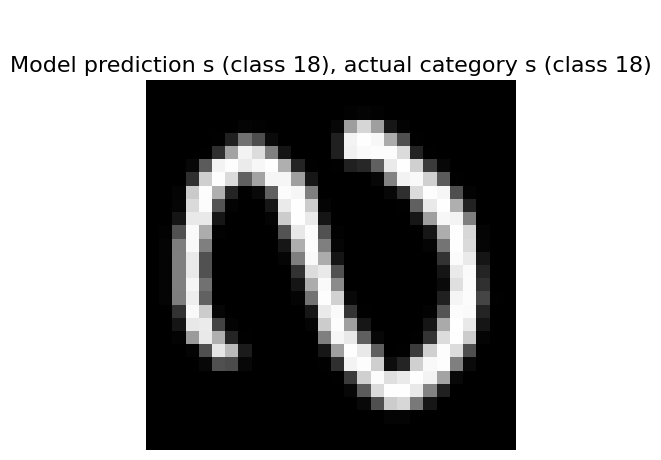

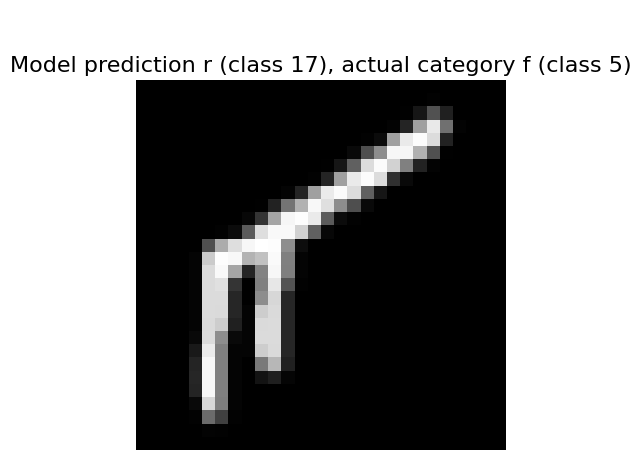

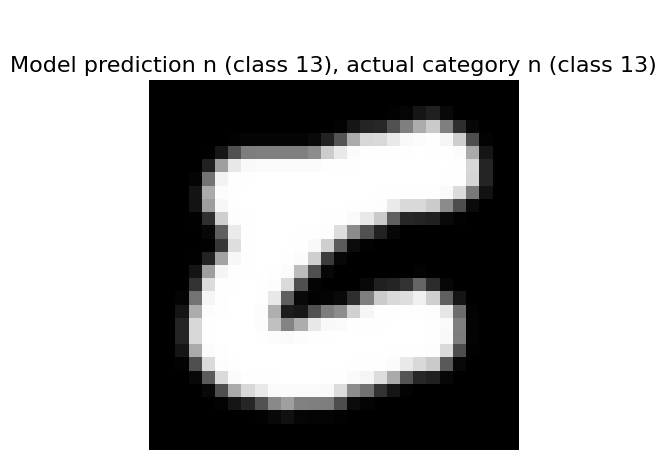

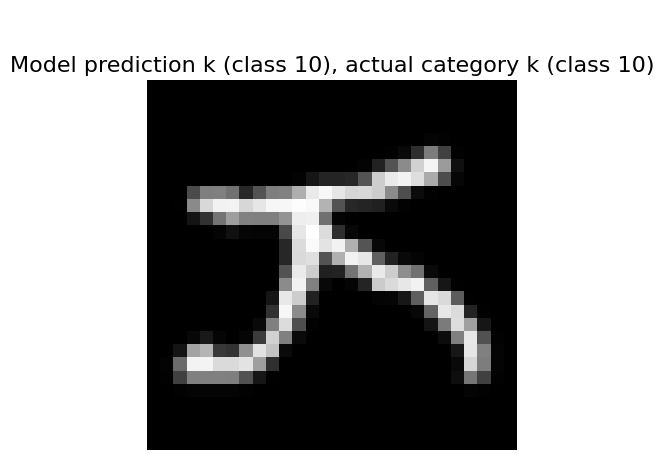

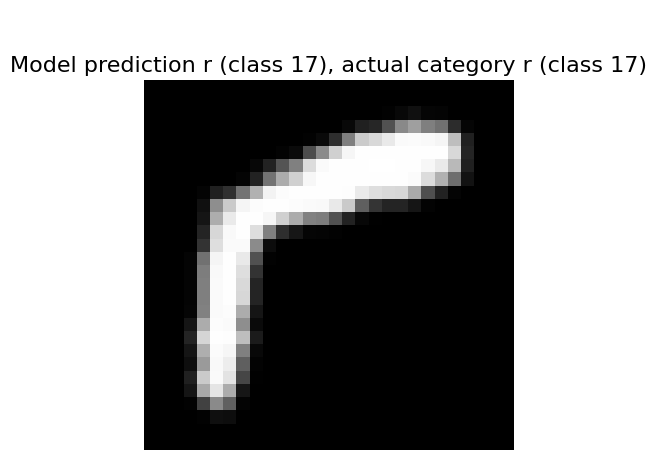

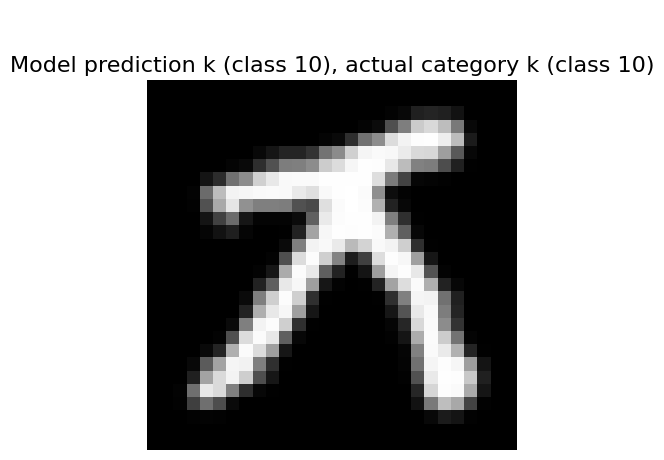

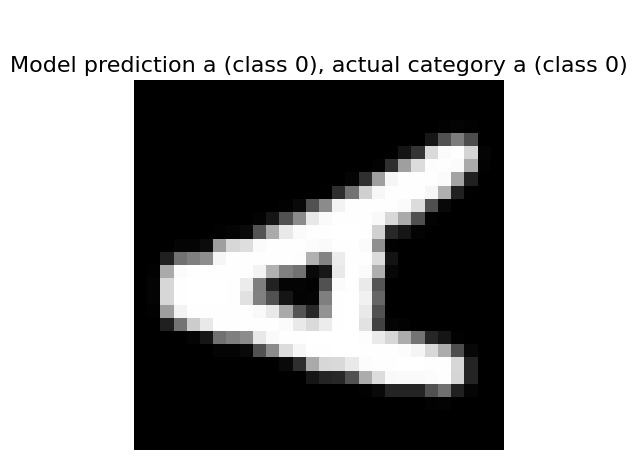

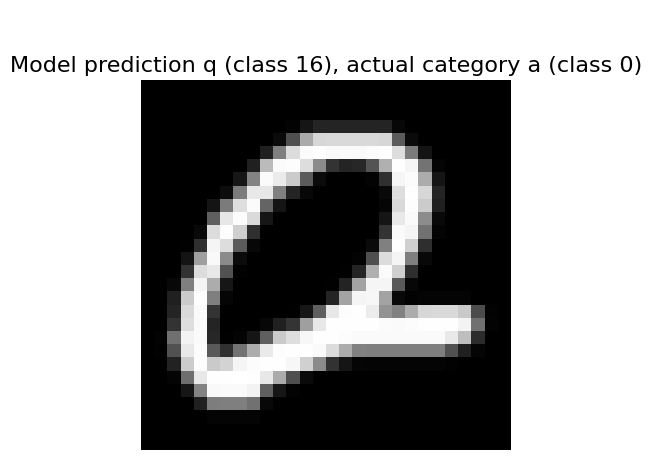

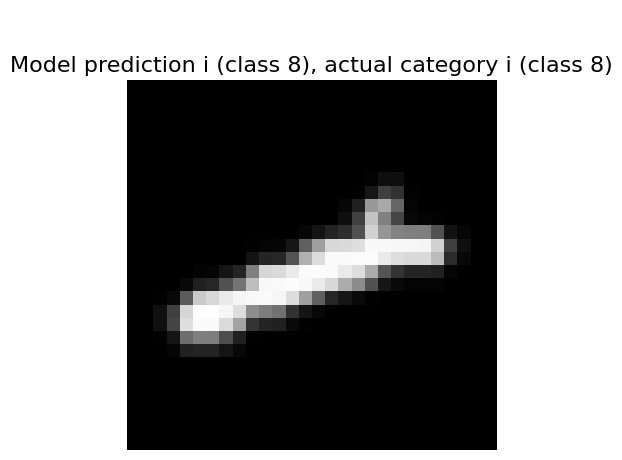

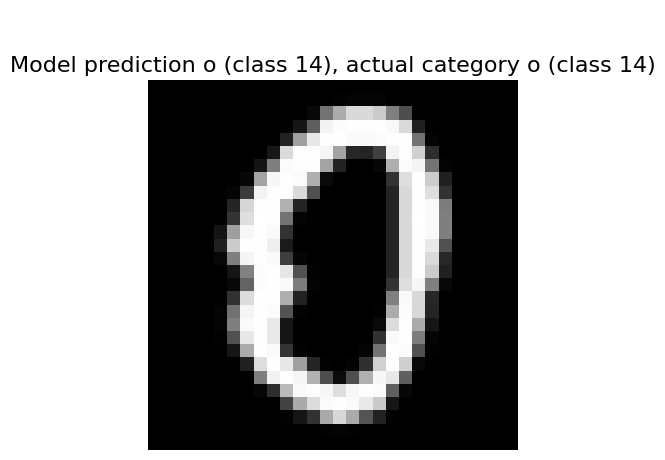

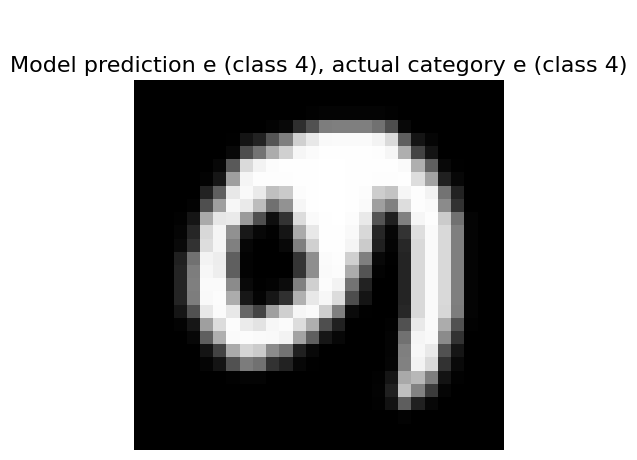

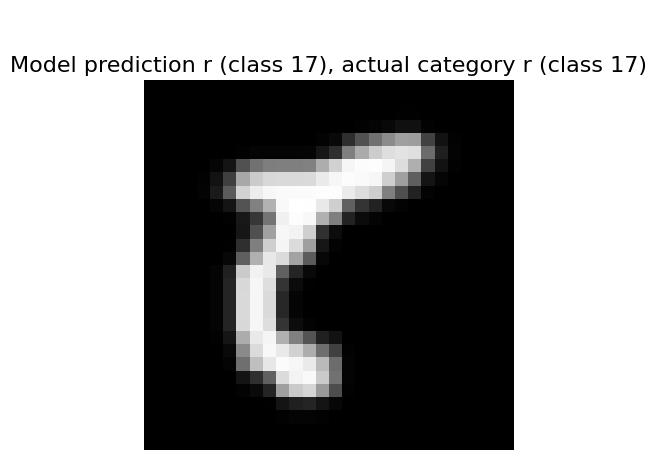

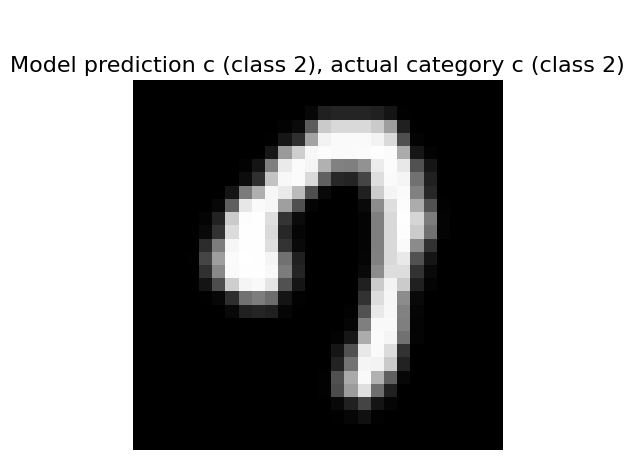

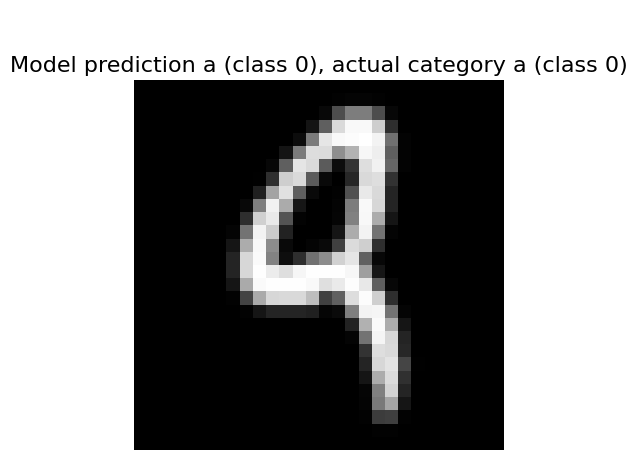

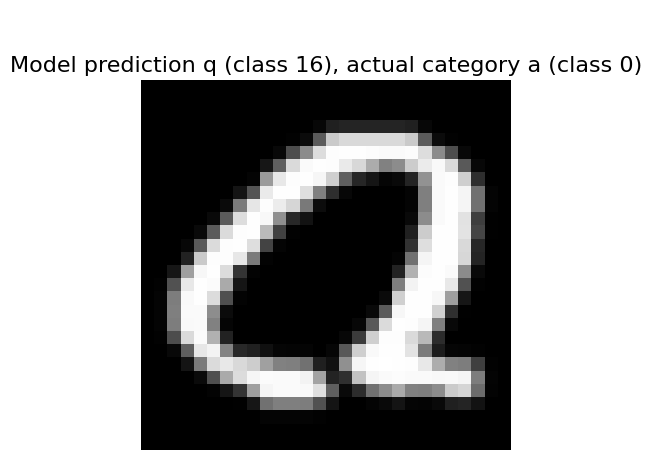

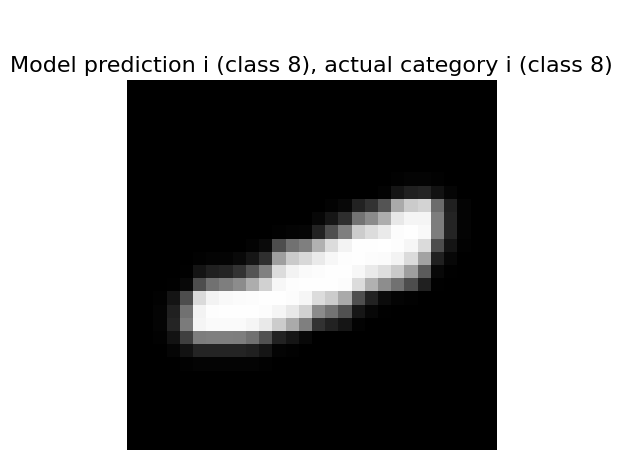

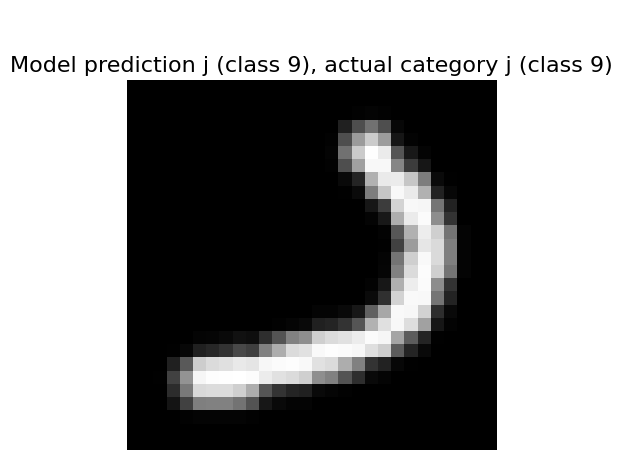

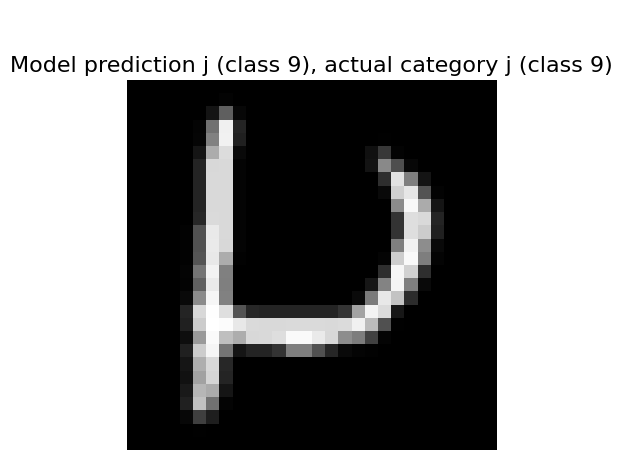

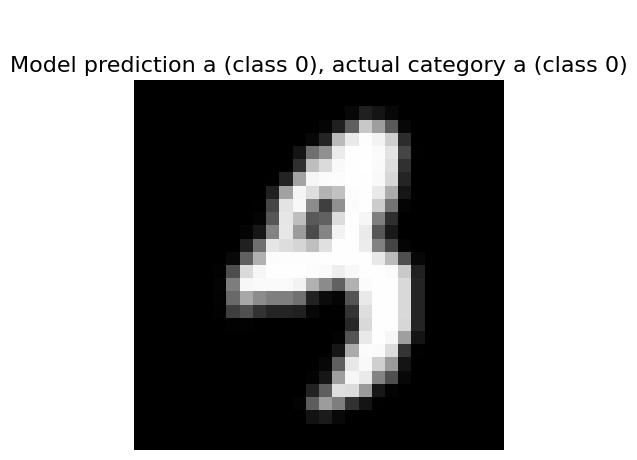

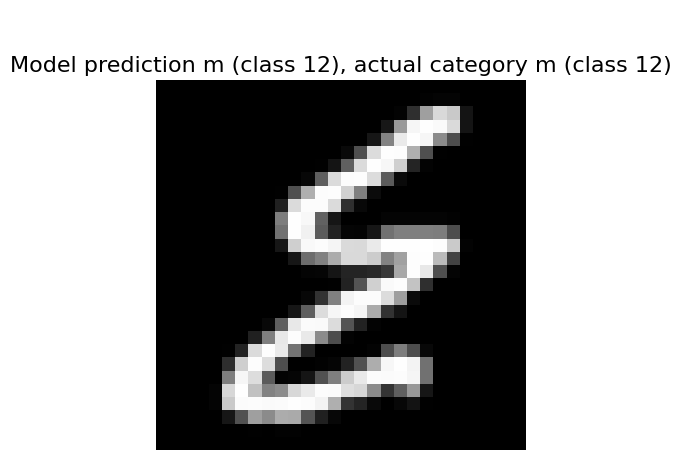

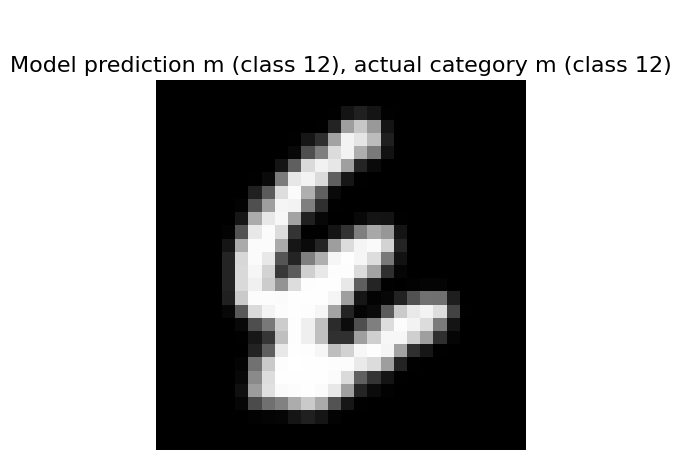

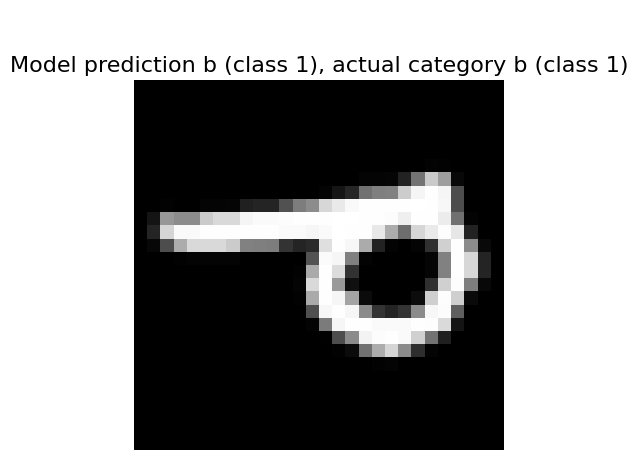

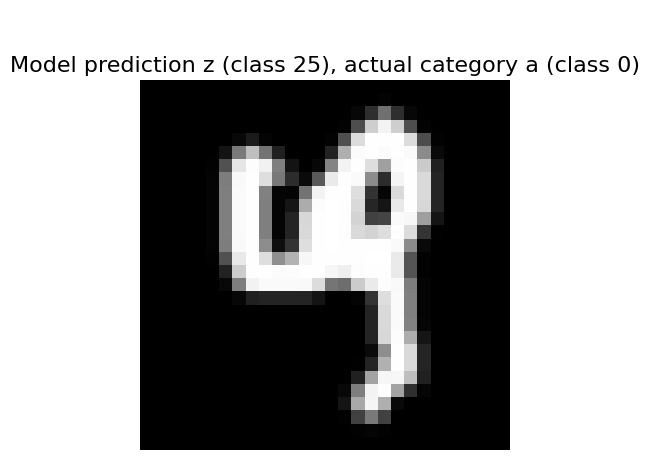

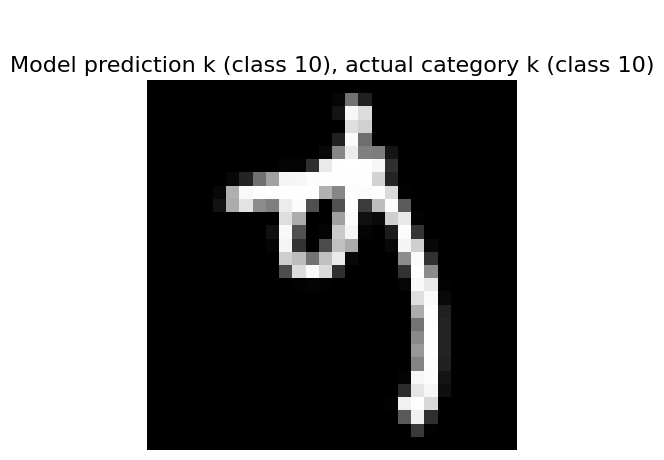

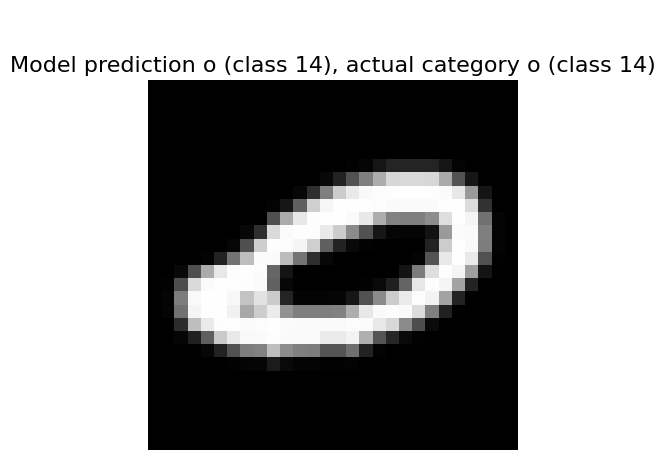

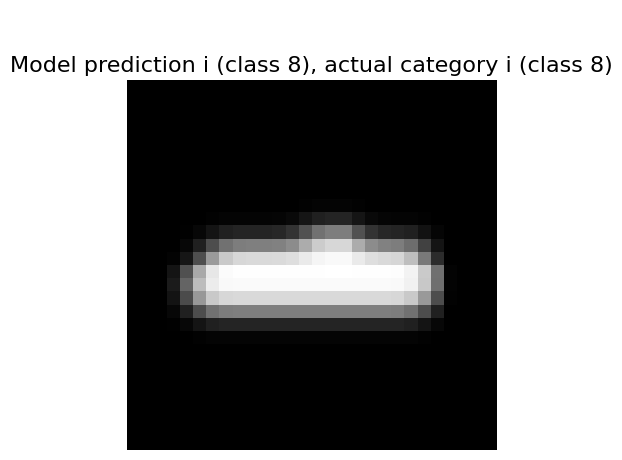

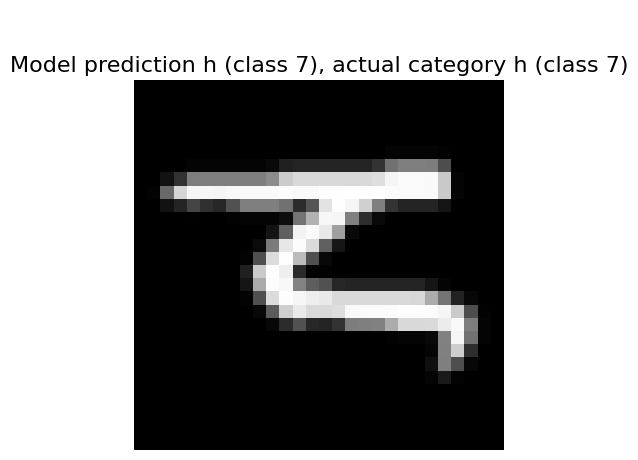

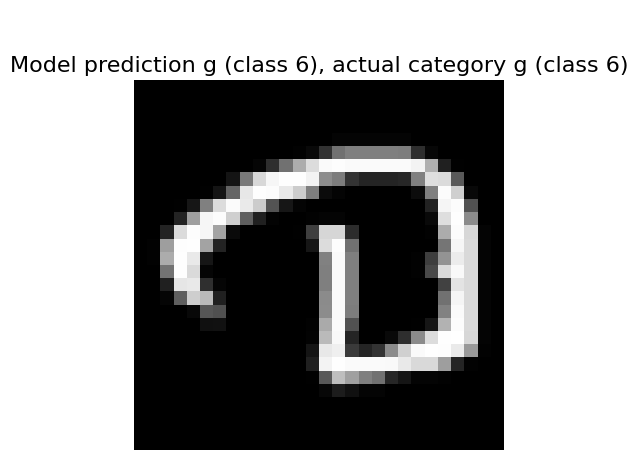

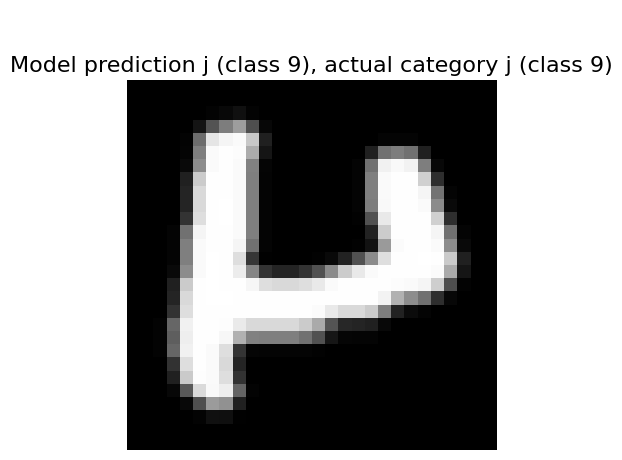

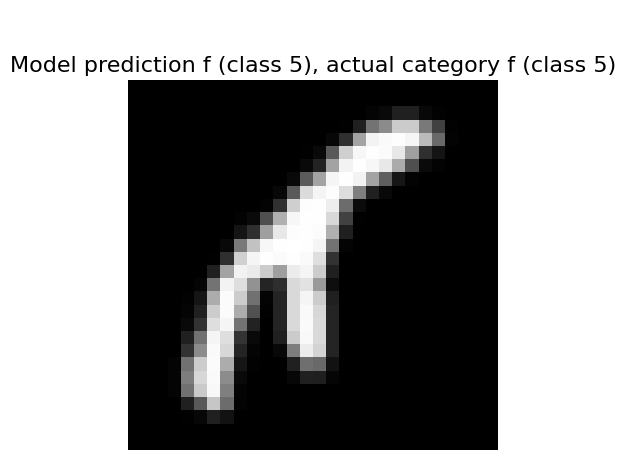

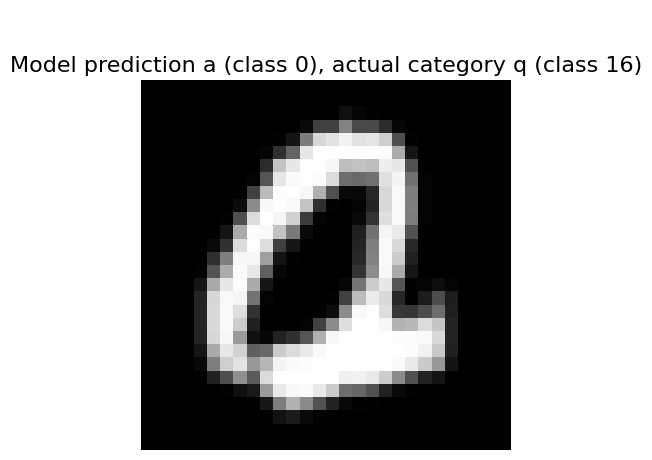

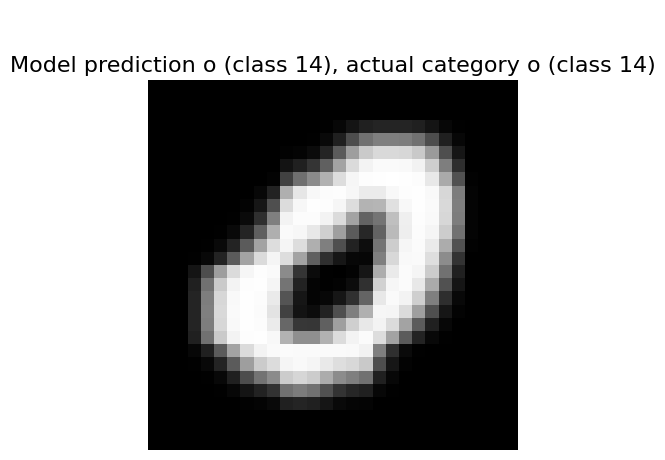

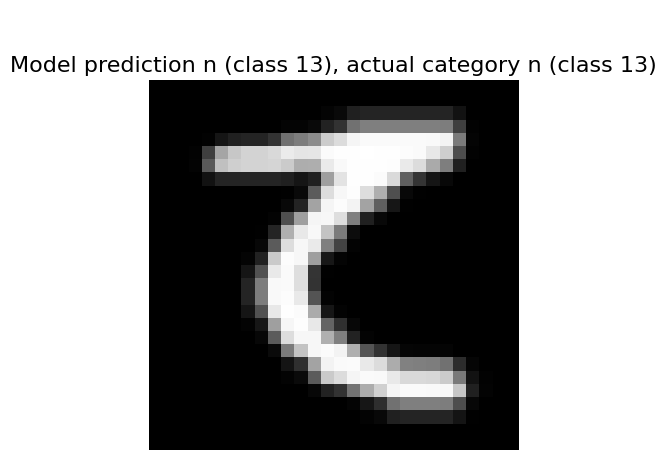

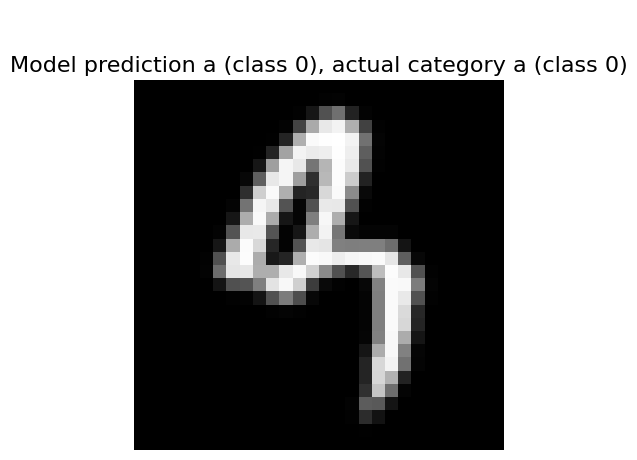

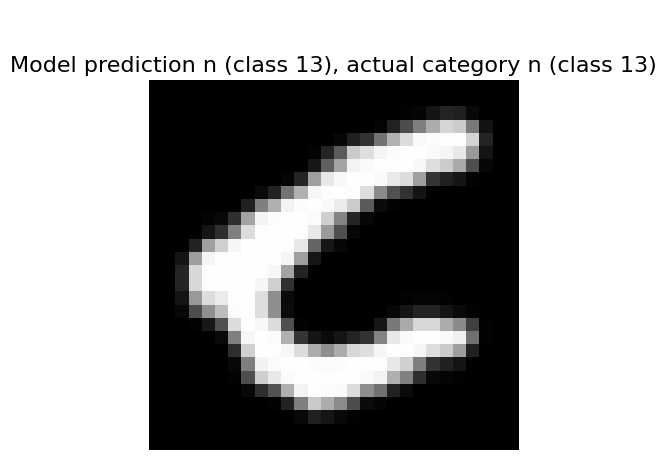

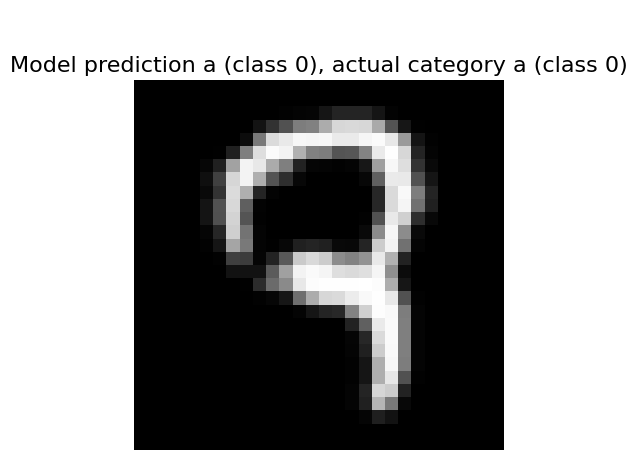

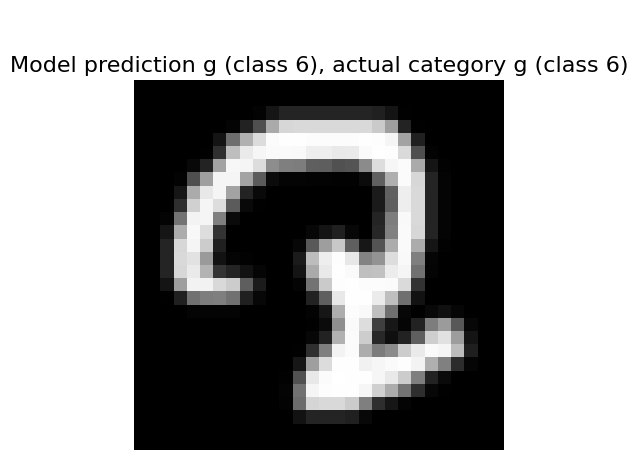

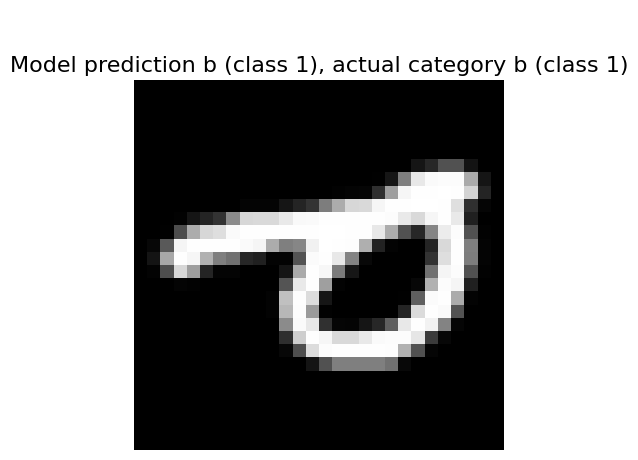

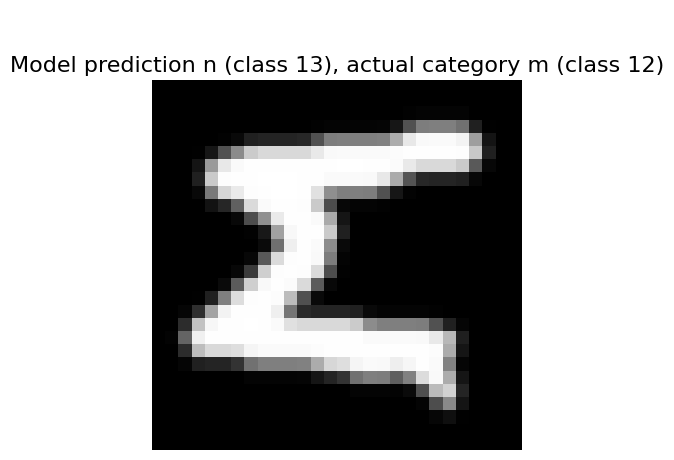

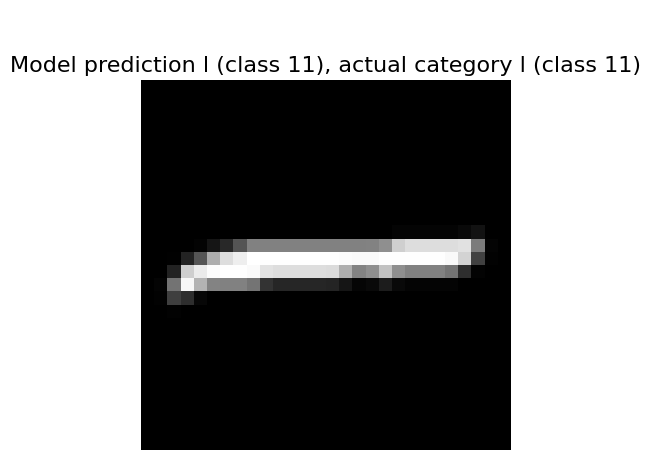

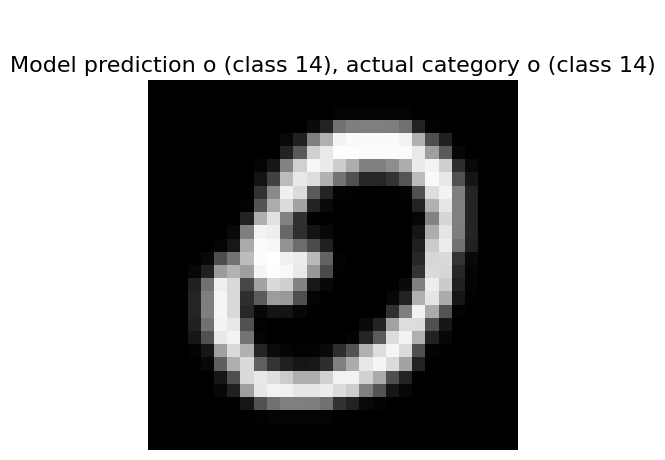

In [ ]:
for i in range(64):
    predicted_class = np.argmax(predictions[i])
    actual_class = test_labels[i].long().item() - 1

    show(i, "Model prediction {} (class {}), actual category {} (class {})".format(
          classes[predicted_class], predicted_class,
          classes[actual_class], actual_class
    ))

### Evaluating Model Performance with Confusion Matrix

Accuracy on test data: 0.8516791675113183


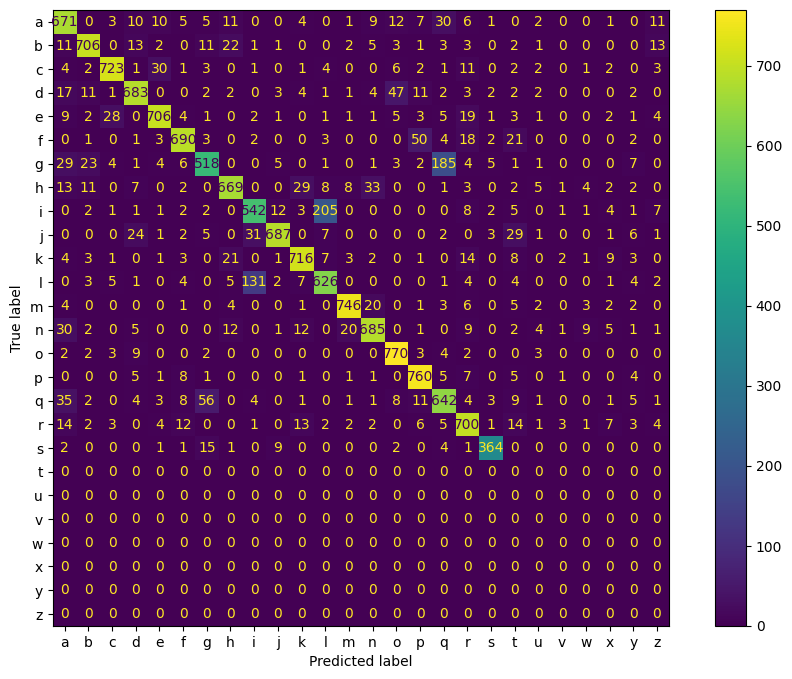

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_dataloader:
        output = loaded_model.predict(inputs.numpy())

        output = np.argmax(output, axis = 1).astype("float64").tolist()
        y_pred.extend(output)

        labels = [ x-1 for x in labels.tolist()]
        y_true.extend(labels)

acc = accuracy_score(y_true, y_pred)
print("Accuracy on test data:", acc)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = classes)
fig, ax = plt.subplots(figsize = (12, 8))
cmp.plot(ax = ax)

In [ ]:
np.trace(cm) / len(test_dataset)

0.8516791675113183

# This concludes the demonstration of building a full MLflow run for an EMNIST letter classification model using a Deep Neural Network.